# 승리 당일, 패배 당일 기사 댓글 크롤링 후 감정 분석

In [82]:
from bs4 import BeautifulSoup
import requests
import re
import sys
import pprint
from selenium import webdriver
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
win_url = 'https://sports.news.naver.com/kbaseball/news/index.nhn?date=20200807&isphoto=N&type=team&team=LT&page=1'
#8월 7일 두산전 역전승 당일 기사

In [7]:
# 롯데 구단 기사 Zone에서 첫 화면 기사만 크롤링 (해당 링크를 이후 For문으로 다시 한 번 돌리기 위해서.)
# 기사 Zone을 선택한 것은 일반 검색으로 나온 기사에는 댓글이 없는 경우도 많기 때문.

options = webdriver.ChromeOptions() 
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")
driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)

win_baseball_url = []
try:
    driver.get(win_url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for tag in soup.select('a.thmb'):
        win_baseball_url.append(('https://sports.news.naver.com' + tag['href']))
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


In [8]:
win_baseball_url

['https://sports.news.naver.com/kbaseball/news/read.nhn?oid=076&aid=0003612249',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=529&aid=0000045389',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004253646',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=421&aid=0004802378',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=076&aid=0003612245',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=382&aid=0000845180',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004253643',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=117&aid=0003395273',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=410&aid=0000717906',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=529&aid=0000045387',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=311&aid=0001185995',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004253638',
 'https://sports.news.naver.

In [9]:
# Read 기사 외에도 포토 기사 등이 같이 추출되어서 Read 기사만을 추출하기 위해 특정 단어('kbaseball')을 포함한 링크만 따로 추출.

win_lotte = []

for i in range(0,len(win_baseball_url)):
    if 'kbaseball' in win_baseball_url[i]:
        win_lotte.append(win_baseball_url[i])

In [10]:
win_lotte

['https://sports.news.naver.com/kbaseball/news/read.nhn?oid=076&aid=0003612249',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=529&aid=0000045389',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004253646',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=421&aid=0004802378',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=076&aid=0003612245',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=382&aid=0000845180',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004253643',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=117&aid=0003395273',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=410&aid=0000717906',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=529&aid=0000045387',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=311&aid=0001185995',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004253638',
 'https://sports.news.naver.

In [11]:
len(win_lotte) # 총 30개의 기사, 패배 기사와 숫자 맞추기 위해 8개 선택. 시간 관계상....

20

In [34]:
from selenium import webdriver
import time

win_datgeul = []

# url을 어떤 식으로 추가해야 좋을까 고민하다가 For문으로 기사 링크를 받아와서 이를 다시 크롤링에 사용.
try:
    for i in range(0,8):
        link = win_lotte[i]
        options = webdriver.ChromeOptions() 
        options.add_argument('headless')
        options.add_argument('window-size=1920x1080')
        options.add_argument("disable-gpu")
        driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)
        driver.implicitly_wait(30)
        driver.get(link)

#전체 댓글 클릭 - 댓글 더보기를 클릭하려면 전체 댓글을 보게 먼저 설정해야 해서 이 부분 클릭하고 더보기 클릭.
        while True:
            try:
                전체댓글더보기 = driver.find_element_by_css_selector('span.u_cbox_in_view_comment')
                전체댓글더보기.click()
                time.sleep(1)
            except:
                break
    
#더보기 클릭
        while True:
            try:
                더보기 = driver.find_element_by_css_selector('a.u_cbox_btn_more')
                더보기.click()
                time.sleep(1)
            except:
                break

        contents = driver.find_elements_by_css_selector('span.u_cbox_contents')
        for content in contents:
            win_datgeul.append(content.text)
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [36]:
win_datgeul

['마지막 댓글 남깁니다. 롯데 자이언츠 선수들, 코치들, 프런트, 치어리더, 쪼단, 직원분들, 단장님 모두들 건강하시고 파이팅하십쇼! 퓨처스, 육성군, 재활군, 군입대 선수분들 모두 최선을 다하셔서 1군 경기에서 자주 뵐 수 있길 기다리겠습니다. 이제 욕할 사람도 없으니... 즐기시면서 맘껏 야구하셨음 좋겠습니다.',
 '이게 댓글창있는 마지막 기사인가? 우리 자이언츠 선수단 여러분, 욕설 일삼는 저질 사회부적응자들보다 여러분들 진심으로 응원하는 팬들이 훨씬 많다는거 잊지말고 즐기는 야구 계속해 주세요. 언제나 부상 조심하고 모두들 오래오래 롱런하시길 바랍니다',
 '마지막 댓글 남깁니다 2020롯데우승이라는 닉을 올해 1월달에 만들었습니다. 닉넴 때문에 수많은 비공과 욕을 먹었습니다만 저는 후회하지 않습니다 야구는 또 어떻게 될지 모르는 스포츠이기 때문이죠 8월부터 반등해서 꼭 겨울야구 했으면 좋겠네요 13년차 롯데 팬으로서',
 '마지막 댓글 남겨봅니다.그래도 롯데 짜증나도 롯데 마지막이니 다시한번 그래도 롯데야화이팅 해보자... 자이언츠 파이팅',
 '허문회 감독님 말씀처럼 반등하려는 기미가 보이기 시작하네요 내일도 두산 잡아서 천천히 반등해보죠 뭐',
 '마지막 댓글창인가ㅠㅠ 우리 선수들 볼지모르겠지만 늘 응원했고 앞으로도 늘 응원합니다!! 이래나 저래나 사랑하는 우리팀 화이팅',
 '마지막 댓글입니다. 롯데자이언츠 선수들 작년과는 확실히 다른 모습을 보여주고 있어서 보는 팬 입장에서 너무나도 기쁩니다. 우승까진 아니더라도 포스트시즌에 진출하길 간절히 빕니다!!DRIVE TO WIN LOTTE 화이팅!!',
 '저도 마지막 댓글 남깁니다. 오늘경기 정말 수고했고 아직 끝날때 까지 끝난게아니다 !! 롯데 힘닿는데 까지 쭉쭉 치고올라가 2017년 3위의 기적 다시 보여줄꺼라 믿습니다 선수들 모두 화이팅 해주세요 2020롯데 포스트시즌 가자 !',
 '롯데야 사랑해',
 '허감독님 항상 고생하시고 모든 롯데 선수들 끝까지 홧팅입니다',
 '다시 댓글창이 생

In [28]:
loss_url = 'https://sports.news.naver.com/kbaseball/news/index.nhn?isphoto=N&date=20200718&type=team&team=LT'
#7월 18일 삼성전 패배 당일 기사

In [29]:
# 승리 당일 기사와 마찬가지 방식으로 패배 당일 기사도 크롤링

options = webdriver.ChromeOptions() 
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")
driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)

loss_baseball_url = []
try:
    driver.get(loss_url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for tag in soup.select('a.thmb'):
        loss_baseball_url.append(('https://sports.news.naver.com' + tag['href']))
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [30]:
loss_lotte = []

for i in range(0,len(loss_baseball_url)):
    if 'kbaseball' in loss_baseball_url[i]:
        loss_lotte.append(loss_baseball_url[i])

In [32]:
loss_lotte

['https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004243497',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004243410',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=468&aid=0000680251',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=477&aid=0000254208',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=311&aid=0001177467',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004243312',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=311&aid=0001177456',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004243305',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004243260',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004243246',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=477&aid=0000254158',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=529&aid=0000044562',
 'https://sports.news.naver.

In [31]:
len(loss_lotte) #23개의 기사. 동일 숫자를 위해서 10개만 선택하기로 함.

13

In [37]:
loss_datgeul = []

try:
    for i in range(0,8):
        link = loss_lotte[i]
        options = webdriver.ChromeOptions() 
        options.add_argument('headless')
        options.add_argument('window-size=1920x1080')
        options.add_argument("disable-gpu")
        driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)
        driver.implicitly_wait(30)
        driver.get(link)

        while True:
            try:
                전체댓글더보기 = driver.find_element_by_css_selector('span.u_cbox_in_view_comment')
                전체댓글더보기.click()
                time.sleep(1)
            except:
                break
    
        while True:
            try:
                더보기 = driver.find_element_by_css_selector('span.u_cbox_btn_more')
                더보기.click()
                time.sleep(1)
            except:
                break

        contents = driver.find_elements_by_css_selector('span.u_cbox_contents')
        for content in contents:
            loss_datgeul.append(content.text)
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [38]:
loss_datgeul

['ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ6회때 왜그렇게 했는지 이해가안된다 나는 ㅋㅋㅋㅋㅋ전준우 아웃당했으면 최소한 허일때 이대호를 대타로냈어야지 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ9회에 주자없는상태에서 이대호내고있네 무슨의미지? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '허일때 대타 안내고..아..그리고..민병헌은 진짜 계륵이다..80억 꺼억..득점권타율 1할5푼...ㅅㅂ ㅋㅋㅋ 헛웃음만 나온다.',
 '근데 9회 이대호대타는뭐냐??친구랑 인사라도하라고 내보냇냐',
 '오늘 패배로 허감독이 현실을 자각하면 좋겠다. 이기겠다고 덤벼든다고 마음대로 되는게 아닌데 ...',
 '수비도 안되고 작전플레이도 안되고..감독님 언제까지 기다려야하죠?? 진짜 생각이있으신게맞나요??',
 '삼성이 시즌 초반엔 투수들이 먹여 살리더니 이젠 타자들이 먹여살리네ㅋㅋ 이제 같이 터져보자',
 '허감독 아무래도 당신은 아닌거 같으니 그냥 내려놓고 두산이나 삼성 감독 밑에서 코치로 좀 더 배우고..그래도 롯데는 오지말고 다른 팀 감독으로 담 기회에..',
 '두팬) 롯데 겜 가끔 보면 허 감독은 관중석에서 관람하는 야구팬같음',
 '투수는 뭐 박세웅 일찍 내려가고 이 정도면 선방했다해도 1회 만루 병살깐 민병헌에 6회 무사 3루 짧은 중플친 전준우에 7회 2사12루 체크스윙 투땅 손아섭 이것들이 아님? 받아먹는 돈이 얼만데 득점권만 되면 오줌지리냐? 민병헌은 부상 안당하냐? 잘할땐 뻑하면 쨍그랑하더니 못할때는 다치지도 않아요 하...',
 '이미 댓글러들이 다 말했듯이 허감독은 박빙싸움에서 치고 나갈수 있는 사람이 아닙니다.. 기록으로도 나오잔아여..제가 갠히 감독을 까는게 아닙니다 .성단장님 부디 빠른 결단을 내려 주새여..',
 '여러분 놀라운 사실 하나 알려드릴까요? 여러분이 득점권 못친다고 하는 전준우보다 더 득타율 낮은애가 민병헌입니다 그렇지만 잘하는게 딱하나 있어요 병살타라고',
 '9회대호대타....엽기였다. 역시 무뇌',
 '안치홍 몸이안좋은거 해설진도 알던데 허문회는 오윤석 콜업도 안했냐!',
 '허문회가 

In [39]:
len(loss_datgeul)

155

# 데이터 전처리 및 라벨링을 위한 데이터프레임 전환

In [40]:
import pandas as pd
import re

In [42]:
win = pd.DataFrame(win_datgeul)
loss = pd.DataFrame(loss_datgeul)

# 라벨링을 위한 엑셀 파일 저장 (라벨링은 어쩔 수 없이 수작업으로 진행)

In [43]:
win.to_excel('./data_in/win.xlsx')
loss.to_excel('./data_in/loss.xlsx')

# 라벨링 작업 후 다시 불러기오

In [51]:
winner = pd.read_excel('./data_in/win.xlsx',index=False)

In [54]:
winner

,Unnamed: 0,0,1
0,0,"마지막 댓글 남깁니다. 롯데 자이언츠 선수들, 코치들, 프런트, 치어리더, 쪼단, ...",1
1,1,"이게 댓글창있는 마지막 기사인가? 우리 자이언츠 선수단 여러분, 욕설 일삼는 저질 ...",1
2,2,마지막 댓글 남깁니다 2020롯데우승이라는 닉을 올해 1월달에 만들었습니다. 닉넴 ...,1
3,3,마지막 댓글 남겨봅니다.그래도 롯데 짜증나도 롯데 마지막이니 다시한번 그래도 롯데야...,1
4,4,허문회 감독님 말씀처럼 반등하려는 기미가 보이기 시작하네요 내일도 두산 잡아서 천천...,1
...,...,...,...
238,238,기자양반8:4다 기자 하지말고다른일찾아봐라,0
239,239,랜디승혁 ㅅㅅㅅㅅㅅ,1
240,240,기)우리 한승혁이는 군대서 잘하고 있니 ㅠ,0
241,241,3년후 아프리카에서 롯데썰 푸는 파오후 bj할듯,0


In [57]:
winner.drop(['Unnamed: 0'],axis=1,inplace=True)

In [61]:
winner.rename(columns={0:'text',1:'label'},inplace=True)

In [62]:
winner

,text,label
0,"마지막 댓글 남깁니다. 롯데 자이언츠 선수들, 코치들, 프런트, 치어리더, 쪼단, ...",1
1,"이게 댓글창있는 마지막 기사인가? 우리 자이언츠 선수단 여러분, 욕설 일삼는 저질 ...",1
2,마지막 댓글 남깁니다 2020롯데우승이라는 닉을 올해 1월달에 만들었습니다. 닉넴 ...,1
3,마지막 댓글 남겨봅니다.그래도 롯데 짜증나도 롯데 마지막이니 다시한번 그래도 롯데야...,1
4,허문회 감독님 말씀처럼 반등하려는 기미가 보이기 시작하네요 내일도 두산 잡아서 천천...,1
...,...,...
238,기자양반8:4다 기자 하지말고다른일찾아봐라,0
239,랜디승혁 ㅅㅅㅅㅅㅅ,1
240,기)우리 한승혁이는 군대서 잘하고 있니 ㅠ,0
241,3년후 아프리카에서 롯데썰 푸는 파오후 bj할듯,0


In [63]:
loser = pd.read_excel('./data_in/loss.xlsx',index=False)

In [64]:
loser

,Unnamed: 0,0,label
0,0,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ6회때 왜그렇게 했는지 이해가안된다 나는 ㅋㅋㅋㅋㅋ전준우 아...,0
1,1,허일때 대타 안내고..아..그리고..민병헌은 진짜 계륵이다..80억 꺼억..득점권타...,0
2,2,근데 9회 이대호대타는뭐냐??친구랑 인사라도하라고 내보냇냐,0
3,3,오늘 패배로 허감독이 현실을 자각하면 좋겠다. 이기겠다고 덤벼든다고 마음대로 되는게...,0
4,4,수비도 안되고 작전플레이도 안되고..감독님 언제까지 기다려야하죠?? 진짜 생각이있으...,0
...,...,...,...
150,150,진즉에 내려갔어야했다,0
151,151,롯데가 선수가 없긴없구나! 콜업된 선수들 성적도 저정도면 진짜 선수들 못키우는 대표...,0
152,152,와 드디어 ! 이제 허문회만 남았네???,0
153,153,패전조 최준용 윤성빈 박명현이면 키우는 맛이라도 있지 노망주에 2군 성적도 ㅆㄹㄱ면...,0


In [65]:
loser.drop(['Unnamed: 0'],axis=1,inplace=True)

In [66]:
loser.rename(columns={0:'text',1:'label'},inplace=True)

In [67]:
loser

,text,label
0,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ6회때 왜그렇게 했는지 이해가안된다 나는 ㅋㅋㅋㅋㅋ전준우 아...,0
1,허일때 대타 안내고..아..그리고..민병헌은 진짜 계륵이다..80억 꺼억..득점권타...,0
2,근데 9회 이대호대타는뭐냐??친구랑 인사라도하라고 내보냇냐,0
3,오늘 패배로 허감독이 현실을 자각하면 좋겠다. 이기겠다고 덤벼든다고 마음대로 되는게...,0
4,수비도 안되고 작전플레이도 안되고..감독님 언제까지 기다려야하죠?? 진짜 생각이있으...,0
...,...,...
150,진즉에 내려갔어야했다,0
151,롯데가 선수가 없긴없구나! 콜업된 선수들 성적도 저정도면 진짜 선수들 못키우는 대표...,0
152,와 드디어 ! 이제 허문회만 남았네???,0
153,패전조 최준용 윤성빈 박명현이면 키우는 맛이라도 있지 노망주에 2군 성적도 ㅆㄹㄱ면...,0


# 각 데이터프레임별 전처리 진행

In [78]:
winner['text'].nunique(), winner['label'].nunique() #중복값 없음

(243, 2)

In [81]:
loser['text'].nunique(), loser['label'].nunique() #중복값 없음

(155, 2)

# 댓글 라벨별 숫자 분포도 확인

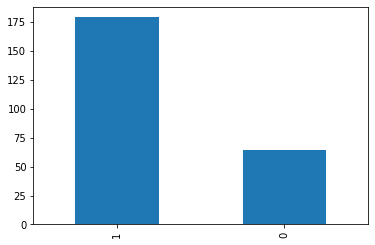

In [83]:
winner['label'].value_counts().plot(kind = 'bar')

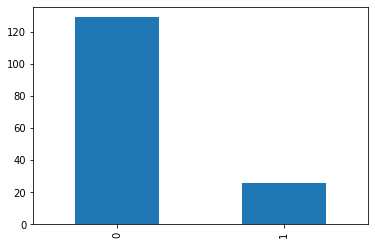

In [84]:
loser['label'].value_counts().plot(kind = 'bar')

# 승리 기사에는 긍정, 패배 기사에는 부정의 댓글이 많았음

In [110]:
#기존에는 승리 기사를 train, 패배 기사를 test set으로 사용 할 생각이었으나 정확도를 위해서 두 기사를 합쳐서 train으로 사용하고
#무승부 경기 당일 기사를 크롤링하여 test set으로 사용하기로 했음.

# 무승부 기사 크롤링

In [111]:
draw_url = 'https://sports.news.naver.com/kbaseball/news/index.nhn?isphoto=N&type=team&team=LT&date=20190611'
#2019년 6월 11일 LG전 무승부 기사

In [112]:
options = webdriver.ChromeOptions() 
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")
driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)

draw_baseball_url = []
try:
    driver.get(draw_url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for tag in soup.select('a.thmb'):
        draw_baseball_url.append(('https://sports.news.naver.com' + tag['href']))
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [113]:
draw_lotte = []

for i in range(0,len(draw_baseball_url)):
    if 'kbaseball' in draw_baseball_url[i]:
        draw_lotte.append(draw_baseball_url[i])

In [114]:
draw_lotte

['https://sports.news.naver.com/kbaseball/news/read.nhn?oid=477&aid=0000188991',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=003&aid=0009280939',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=311&aid=0001003055',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=108&aid=0002789582',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=003&aid=0009280933',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=144&aid=0000615382',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=450&aid=0000051917',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=396&aid=0000515895',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004027301',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=382&aid=0000737988',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=410&aid=0000594240',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004027171',
 'https://sports.news.naver.

In [115]:
len(draw_lotte)

20

In [116]:
draw_datgeul = []

try:
    for i in range(0,8):
        link = draw_lotte[i]
        options = webdriver.ChromeOptions() 
        options.add_argument('headless')
        options.add_argument('window-size=1920x1080')
        options.add_argument("disable-gpu")
        driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)
        driver.implicitly_wait(30)
        driver.get(link)

        while True:
            try:
                전체댓글더보기 = driver.find_element_by_css_selector('span.u_cbox_in_view_comment')
                전체댓글더보기.click()
                time.sleep(1)
            except:
                break
    
        while True:
            try:
                더보기 = driver.find_element_by_css_selector('span.u_cbox_btn_more')
                더보기.click()
                time.sleep(1)
            except:
                break

        contents = driver.find_elements_by_css_selector('span.u_cbox_contents')
        for content in contents:
            draw_datgeul.append(content.text)
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [117]:
draw_datgeul

['레일리가 직접 타석에 들어서고 싶었을듯',
 '에이스가 이정도 던져주면 이겨야 정상적인데 워낙에 비정상적인 팀이라....',
 '레일리가 1선발급은 아니지만 내쫓자는건 올해만 야구 본거다. 탈삼진 꾸준히 5위안이고, 평자도 10위에 슬로우 스타터라 그렇지 텍사스 출신이라 더우면 날아댕긴다 항상. 그냥 기다리자',
 '레일리 진심 ㅈㄴ 저평가 받는것같음',
 '레일리 수고했어요. 앞으로도 이렇게만 던져주길',
 '이러고도 레일리를 교체하잔다. 이런게 한두번이냐? 6-7승을 해야 정상인데 매번 불펜이 날려먹거나 타자들이 못해줌. 정녕 레일리가 못해서 꼴데라고 생각하냐?',
 '레일리야... 늘 고맙고 늘 미안타... 원중이는 득점 그래 잘내주는데 너만 나오면 왜그렇게 짜니... ㅠㅠ',
 '두산갔다면 7승은 했을것이다',
 '나종덕 타율 류현진 방어율과 경쟁중...',
 '다익손은 합류후 첫경기 덕아웃에서 봤는데 어떤기분이 들었을까... 레일리가 저정도로 잘했는데 이꼴난거보면',
 '레일리는 유독 승운이 없는것 같다. 안타깝다.',
 '승패 상관없이, 다익손 후배 잘 이끌어 주시길 ... 오늘 최고의 피팅 감사합니다. 오랜만에 야구 다웠습니다.',
 '진심 엘지타선 만나는 투수는 다 에이스급 되네 엘지투수들이 엘지타선 안 만나고도 평자1위인건 진심 투수력은 극강인듯',
 '와~ 레일리내고 부상으로 1.5군된 팀도 못이기는구나. 니들이 연봉1위 프로 선수들 맞냐',
 '레일리 진짜 불쌍하다 퀄스 8번에 2승은 뭐냐?',
 '레일리 두산가면 20승인데...',
 '레일리 다른팀 가면 기본 10승 이상',
 '엘펜인디 양팀 투수전은 잘봤는데양팀다 타선이 어휴...',
 '타격코치 코스프레 김승관',
 '내가 다 레일리한테 미안해서 눈물나더라 이런 호투에 승리를 못챙겨주고 ㅋㅋ 진심 타선 못봐줄꼴임 롯데는 지금 투수, 외인이 문제가 아니다 단장, 프런트부터 손보고 한국시리즈 우승경력있는 감독을 데려오던지 외국감독을데려오던지 해서 코치진도 싹 다 바꾸고 타자들 각성해야

In [118]:
len(draw_datgeul)

142

In [119]:
draw = pd.DataFrame(draw_datgeul)
draw.to_excel('./data_in/draw.xlsx',index=False)
drawed = pd.read_excel('./data_in/draw.xlsx')
drawed

In [121]:
draw.to_excel('./data_in/draw.xlsx',index=False)

In [124]:
drawed = pd.read_excel('./data_in/draw.xlsx')

In [125]:
drawed

,0,1
0,레일리가 직접 타석에 들어서고 싶었을듯,0
1,에이스가 이정도 던져주면 이겨야 정상적인데 워낙에 비정상적인 팀이라....,0
2,레일리가 1선발급은 아니지만 내쫓자는건 올해만 야구 본거다. 탈삼진 꾸준히 5위안이...,1
3,레일리 진심 ㅈㄴ 저평가 받는것같음,1
4,레일리 수고했어요. 앞으로도 이렇게만 던져주길,1
...,...,...
137,두산옴최소 15승각...,1
138,나올 때마다 퀄리티스타트 해주는 좌완. 말해 무엇하리,1
139,익손이도 고생좀 하겠네,1
140,심판이 지배한 경기였다. 존이...와.....,0


In [127]:
drawed.rename(columns={0:'text',1:'label'},inplace=True)

In [128]:
drawed

,text,label
0,레일리가 직접 타석에 들어서고 싶었을듯,0
1,에이스가 이정도 던져주면 이겨야 정상적인데 워낙에 비정상적인 팀이라....,0
2,레일리가 1선발급은 아니지만 내쫓자는건 올해만 야구 본거다. 탈삼진 꾸준히 5위안이...,1
3,레일리 진심 ㅈㄴ 저평가 받는것같음,1
4,레일리 수고했어요. 앞으로도 이렇게만 던져주길,1
...,...,...
137,두산옴최소 15승각...,1
138,나올 때마다 퀄리티스타트 해주는 좌완. 말해 무엇하리,1
139,익손이도 고생좀 하겠네,1
140,심판이 지배한 경기였다. 존이...와.....,0


In [129]:
drawed['text'].nunique(), drawed['label'].nunique() #중복값 없음

(141, 2)

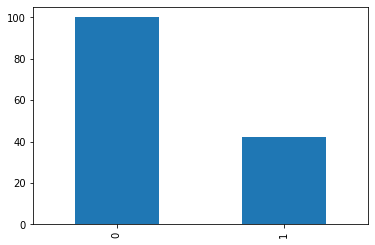

In [134]:
drawed['label'].value_counts().plot(kind = 'bar')

In [135]:
#롯데가 2019시즌 꼴찌를 했고, 워낙 경기력이 좋지 않아서 무승부임에도 부정의 댓글이 많다...
#긍정의 댓글도 당일 선발 투수였던 '레일리' 선수를 칭찬하고 응원하는 내용이 대부분...

# 정규식을 활용한 텍스트 전처리 진행

In [86]:
winner['text'] = winner['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣\s]","")

In [91]:
winner['text'].isnull().sum() # 일단은 Null값이 없음

0

In [97]:
winner['text'].replace('',"NaN",inplace=True)

In [99]:
winner['text'].isnull().sum() # 빈칸만 있는 값도 없음

0

In [100]:
loser['text'] = loser['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣\s]","")

In [101]:
loser['text'].isnull().sum() # 일단은 Null값이 없음

0

In [102]:
loser['text'].replace('',"NaN",inplace=True)

In [103]:
loser['text'].isnull().sum() # 빈칸만 있는 값도 없음

0

In [130]:
drawed['text'] = drawed['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣\s]","")

In [131]:
drawed['text'].isnull().sum()

0

In [132]:
drawed['text'].replace('',"NaN",inplace=True)

In [133]:
drawed['text'].isnull().sum()

0

# 승리, 패배 데이터프레임을 합쳐서 train으로 지정

In [138]:
train = pd.concat([winner, loser],axis=0)

In [139]:
train

,text,label
0,마지막 댓글 남깁니다 롯데 자이언츠 선수들 코치들 프런트 치어리더 쪼단 직원분들 단...,1
1,이게 댓글창있는 마지막 기사인가 우리 자이언츠 선수단 여러분 욕설 일삼는 저질 사회...,1
2,마지막 댓글 남깁니다 롯데우승이라는 닉을 올해 월달에 만들었습니다 닉넴 때문에 수많...,1
3,마지막 댓글 남겨봅니다그래도 롯데 짜증나도 롯데 마지막이니 다시한번 그래도 롯데야화...,1
4,허문회 감독님 말씀처럼 반등하려는 기미가 보이기 시작하네요 내일도 두산 잡아서 천천...,1
...,...,...
150,진즉에 내려갔어야했다,0
151,롯데가 선수가 없긴없구나 콜업된 선수들 성적도 저정도면 진짜 선수들 못키우는 대표적...,0
152,와 드디어 이제 허문회만 남았네,0
153,패전조 최준용 윤성빈 박명현이면 키우는 맛이라도 있지 노망주에 군 성적도 ㅆㄹㄱ면 ...,0


# 무승부는 test로 지정

In [272]:
test = drawed

In [273]:
test

,text,label
0,레일리가 직접 타석에 들어서고 싶었을듯,0
1,에이스가 이정도 던져주면 이겨야 정상적인데 워낙에 비정상적인 팀이라,0
2,레일리가 선발급은 아니지만 내쫓자는건 올해만 야구 본거다 탈삼진 꾸준히 위안이고 평...,1
3,레일리 진심 ㅈㄴ 저평가 받는것같음,1
4,레일리 수고했어요 앞으로도 이렇게만 던져주길,1
...,...,...
137,두산옴최소 승각,1
138,나올 때마다 퀄리티스타트 해주는 좌완 말해 무엇하리,1
139,익손이도 고생좀 하겠네,1
140,심판이 지배한 경기였다 존이와,0


# 토큰화 진행

In [142]:
# 토큰화 진행. 댓글이라는 것을 감안해서 stop_words 설정에 조금 신경을 쓰기로 함.

In [107]:
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [325]:
okt = Okt()

In [150]:
stopwords = ['은','는','이','가', '군','년','뇬','애','하','아','에','것','들','의','있','되','돼','수','보','주','등','한','련','년','레일리','다익손','나종덕']

In [189]:
X_train = []
for sentence in train['text']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [190]:
X_train

[['마지막',
  '댓글',
  '남기다',
  '롯데',
  '자이언츠',
  '선수',
  '코치',
  '프런트',
  '치어리더',
  '쪼단',
  '직원',
  '분들',
  '단',
  '장님',
  '모두',
  '건강하다',
  '파이팅',
  '하다',
  '쇼',
  '퓨처',
  '스',
  '육성',
  '재활',
  '군입대',
  '선수',
  '분들',
  '모두',
  '최선',
  '을',
  '다',
  '하다',
  '경기',
  '에서',
  '자주',
  '뵈다',
  '있다',
  '기다리다',
  '이제',
  '욕',
  '하다',
  '사람',
  '도',
  '없다',
  '즐기다',
  '맘껏',
  '야구',
  '하다',
  '좋다'],
 ['게',
  '댓글',
  '창',
  '있다',
  '마지막',
  '기사',
  '인가',
  '우리',
  '자이언츠',
  '선수단',
  '여러분',
  '욕설',
  '일삼',
  '늘다',
  '저',
  '질',
  '사',
  '회부',
  '적응',
  '자',
  '들보',
  '다',
  '여러분',
  '진심',
  '으로',
  '응원',
  '하다',
  '팬',
  '훨씬',
  '많다',
  '잊다',
  '즐기다',
  '야구',
  '계속',
  '하다',
  '줄다',
  '언제나',
  '부상',
  '조심하다',
  '모두',
  '오래오래',
  '롱런',
  '하다',
  '바라다'],
 ['마지막',
  '댓글',
  '남기다',
  '롯데',
  '우승',
  '이라는',
  '닉',
  '을',
  '올해',
  '월달',
  '만들다',
  '닉넴',
  '때문',
  '수많다',
  '비',
  '공과',
  '욕',
  '을',
  '먹다',
  '저',
  '후회',
  '하다',
  '않다',
  '야구',
  '또',
  '어떻다',
  '되다',
  '모르다',
  '스포츠',
  '이기',
  '때문',
 

In [191]:
X_test = []
for sentence in test['text']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [192]:
X_test

[['직접', '타석', '들어서다', '싶다'],
 ['에이스',
  '이정',
  '도',
  '던지다',
  '이기다',
  '정상',
  '적',
  '인데',
  '워낙',
  '비정상',
  '적',
  '인',
  '팀',
  '이라'],
 ['선발',
  '급',
  '아니다',
  '내쫓다',
  '건',
  '올해',
  '만',
  '야구',
  '보다',
  '탈삼진',
  '꾸준하다',
  '위안',
  '이고',
  '평자',
  '도',
  '위',
  '슬로우',
  '스타',
  '터',
  '라',
  '그렇다',
  '텍사스',
  '출신',
  '이라',
  '덥다',
  '날',
  '댕',
  '기다',
  '항상',
  '그냥',
  '기다리다'],
 ['진심', 'ㅈㄴ', '저', '평가', '받다', '같다'],
 ['수고', '하다', '앞', '으로도', '이렇다', '던지다'],
 ['이르다',
  '를',
  '교체',
  '자다',
  '이렇다',
  '한두',
  '번',
  '이냐',
  '승',
  '을',
  '하다',
  '정상',
  '인데',
  '매번',
  '불펜',
  '날다',
  '먹다',
  '타자',
  '못',
  '해주다',
  '정녕',
  '못',
  '하다',
  '꼴다',
  '생각',
  '하다'],
 ['야',
  '늘',
  '고맙다',
  '늘',
  '미안',
  '타',
  '원',
  '중이',
  '득점',
  '그렇다',
  '잘',
  '내주다',
  '너',
  '만',
  '나오다',
  '왜',
  '그렇게',
  '짜다',
  'ㅠㅠ'],
 ['두산', '가다', '승은', '하다'],
 ['타율', '류현진', '방어율', '과', '경쟁', '중'],
 ['다',
  '익손',
  '합류',
  '후',
  '첫',
  '경기',
  '덕아웃',
  '에서',
  '보다',
  '어떤',
  '기분',
  '들다',
  '저',
  '정도',


In [193]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [194]:
print(tokenizer.word_index)

{'하다': 1, '롯데': 2, '도': 3, '보다': 4, '있다': 5, '댓글': 6, '선수': 7, '을': 8, '좋다': 9, '감독': 10, '없다': 11, '에서': 12, '전준우': 13, '이다': 14, '못': 15, '올리다': 16, '아니다': 17, '경기': 18, '으로': 19, '되다': 20, '다': 21, '를': 22, '오늘': 23, '잘': 24, '오다': 25, '마지막': 26, '박시영': 27, '때': 28, '야구': 29, '만': 30, '좀': 31, '진명호': 32, '회': 33, '이제': 34, '안': 35, '로': 36, '투수': 37, '진짜': 38, '자다': 39, '화이팅': 40, '허일': 41, '팬': 42, '팀': 43, '하고': 44, '내다': 45, '던지다': 46, '고': 47, '하나': 48, '안되다': 49, '만루': 50, '나오다': 51, '더': 52, '까지': 53, '가다': 54, '면': 55, '번': 56, '같다': 57, '만들다': 58, '정말': 59, '난': 60, '들다': 61, '대': 62, '알다': 63, '보내다': 64, '자이언츠': 65, '우리': 66, '응원': 67, '허문회': 68, '치': 69, '허다': 70, '왜': 71, '이기다': 72, '공': 73, '치다': 74, 'ㅋㅋ': 75, '오윤석': 76, '저': 77, '먹다': 78, '않다': 79, '뭐': 80, '홈런': 81, '인데': 82, '라': 83, '두': 84, '남기다': 85, '다시': 86, '해보다': 87, '인': 88, '너무': 89, '적': 90, '주다': 91, '나': 92, '중': 93, '제발': 94, '내리다': 95, '모르다': 96, '월': 97, '그래도': 98, '야': 99, '님': 100, 'ㅠㅠ': 101, '거': 102

In [195]:
threshold = 1
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1694
등장 빈도가 0번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [196]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1696


In [197]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [198]:
import numpy as np

In [199]:
y_train = np.array(train['label'])
y_test = np.array(test['label'])

In [200]:
print(len(X_train))
print(len(y_train))

398
398


리뷰의 최대 길이 : 83
리뷰의 평균 길이 : 13.688442211055277


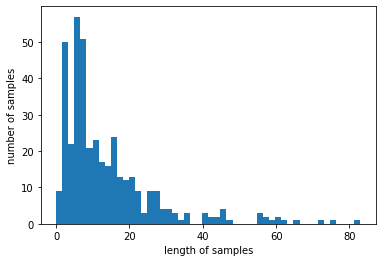

In [201]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [202]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [203]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 96.73366834170855


In [204]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# LSTM을 사용하여 야구 댓글 감성 분류

In [205]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [207]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [208]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [222]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=80, validation_split=0.4)

Epoch 1/20
3/3 [==============================] - ETA: 0s - loss: 2.4436 - acc: 0.7689
Epoch 00001: val_acc did not improve from 0.82500
3/3 [==============================] - 1s 289ms/step - loss: 2.4436 - acc: 0.7689 - val_loss: 0.8813 - val_acc: 0.6875
Epoch 2/20
3/3 [==============================] - ETA: 0s - loss: 0.0278 - acc: 0.9958
Epoch 00002: val_acc did not improve from 0.82500
3/3 [==============================] - 0s 89ms/step - loss: 0.0278 - acc: 0.9958 - val_loss: 0.7928 - val_acc: 0.6875
Epoch 3/20
3/3 [==============================] - ETA: 0s - loss: 0.0241 - acc: 0.9958
Epoch 00003: val_acc did not improve from 0.82500
3/3 [==============================] - 0s 88ms/step - loss: 0.0241 - acc: 0.9958 - val_loss: 0.8155 - val_acc: 0.7000
Epoch 4/20
3/3 [==============================] - ETA: 0s - loss: 0.0218 - acc: 0.9958
Epoch 00004: val_acc did not improve from 0.82500
3/3 [==============================] - 0s 78ms/step - loss: 0.0218 - acc: 0.9958 - val_loss: 0.84

In [223]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

5/5 [==============================] - 0s 8ms/step - loss: 0.7003 - acc: 0.6761

 테스트 정확도: 0.6761


# 리뷰 예측

In [239]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [240]:
sentiment_predict('롯데 야구 개못해')

57.14% 확률로 부정 리뷰입니다.



In [241]:
sentiment_predict('롯데 짱')

52.83% 확률로 부정 리뷰입니다.



In [242]:
sentiment_predict('연봉 반납해라')

71.89% 확률로 부정 리뷰입니다.



In [243]:
sentiment_predict('롯데 화이팅')

60.29% 확률로 긍정 리뷰입니다.



In [244]:
sentiment_predict('감독 뭐하냐')

82.67% 확률로 부정 리뷰입니다.



In [245]:
sentiment_predict('야구 재밌다')

69.69% 확률로 부정 리뷰입니다.



# 번외1. test set 변화

In [246]:
# test데이터에 너무 부정의 라벨이 많았던 것 같아서 승리 경기 기사 댓글을 조금 더 포함시켜보기로 함

In [247]:
win2_url = 'https://sports.news.naver.com/kbaseball/news/index.nhn?isphoto=N&type=team&team=LT&date=20200809'

In [248]:
options = webdriver.ChromeOptions() 
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")
driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)

win2_baseball_url = []
try:
    driver.get(win2_url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for tag in soup.select('a.thmb'):
        win2_baseball_url.append(('https://sports.news.naver.com' + tag['href']))
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [249]:
win_lotte2 = []

for i in range(0,len(win2_baseball_url)):
    if 'kbaseball' in win2_baseball_url[i]:
        win_lotte2.append(win2_baseball_url[i])

In [250]:
win_lotte2

['https://sports.news.naver.com/kbaseball/news/read.nhn?oid=020&aid=0003302325',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=032&aid=0003025660',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=396&aid=0000557611',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=108&aid=0002885555',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=144&aid=0000684696',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=421&aid=0004803813',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004254190',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=477&aid=0000257732',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=477&aid=0000257724',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004254177',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0004254161',
 'https://sports.news.naver.com/kbaseball/news/read.nhn?oid=421&aid=0004803582',
 'https://sports.news.naver.

In [252]:
win2_datgeul = []

try:
    for i in range(0,8):
        link = win_lotte2[i]
        options = webdriver.ChromeOptions() 
        options.add_argument('headless')
        options.add_argument('window-size=1920x1080')
        options.add_argument("disable-gpu")
        driver = webdriver.Chrome('C:/chromedriver.exe',chrome_options=options)
        driver.implicitly_wait(30)
        driver.get(link)

        while True:
            try:
                전체댓글더보기 = driver.find_element_by_css_selector('span.u_cbox_in_view_comment')
                전체댓글더보기.click()
                time.sleep(1)
            except:
                break
    
        while True:
            try:
                더보기 = driver.find_element_by_css_selector('span.u_cbox_btn_more')
                더보기.click()
                time.sleep(1)
            except:
                break

        contents = driver.find_elements_by_css_selector('span.u_cbox_contents')
        for content in contents:
            win2_datgeul.append(content.text)
finally:
    driver.close()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [253]:
win2_datgeul

['17년 8월 다시 재현해보자',
 '진격의거인은 좀더두고보자 아직 경기 많다.',
 '다음주 주중 nc전 스윕하면서 본격적으로 5강 경쟁에 합류하자~! nc가 물론 여전히 1위를 질주하고 있으나 시즌 초에 비해서는 페이스가 약간 줄어들었으니... 지금 nc 페이스가 약간 시즌 초 kt sk 위닝시리즈 이후 내리막길 걸었던 롯데 시즌 초 페이스랑 비슷해보임...',
 '샘슨만 올라와주면 우승도 가능하다.',
 '팔 치 올 허문회선생Coming up in August.',
 '동네 샌드백sk 두들겨패서 연승하고선 설레발인듯. 담주nc3연전 끝나고 이야기해도 안늦어요.물론 비때문에 몇경기나 할지 모르겠지만',
 '스트도 그렇고 롯데 용병도 실력, 인성 다 훌륭하다...',
 '롯데의 범타처리율 1등공신은 당연 마차도 이지요! 솔직히 롯데 수비가좋아지니 보는 재미가 쏠쏠~~',
 '8월 반도안지났다 nc 키움전 보고 설레발 치자',
 '1위와 승차 끼기 8월 말엔 승차 제로 가자!!ㅋㅋ',
 '허말진 ㄷㄷ',
 '허허... 난 반대입니다 겨우10경기 반짝했다고 또또...',
 '롯데는 어차피 꼴데다',
 '역시.꼴리건들은.꼴리건들이다ㅋ7위샙히들이 별 개소리를 늘어놓고있다. 겜차 안난다고ㅋ그런식으로 칩이나 개아도 나가떨어졌어ㅋㅋ니들이 계속 이길거같지ㅋ좀있음 또 쌍욕하고 심판탓감독탓ㅋ하고있을거다. 꼴리건들아',
 '응 어차피 가을 못가면 개까여 ㅋㅋㅋ',
 '허문회 감독은 8월이 승부처라고 한적이 없는데... 9월이 승부처라고 했지. 근데 369론부터 해서 너무나 많은 말을 싸질러놓고 다녀서 그냥 다 끼워맞추면 될듯. 진드감치 지켜봐라. 어차피 시즌끝나면 결과로 말하게 될거다',
 '8월의 롯데는 완전히 달라졌네 계속해서 이어지기를 바랍니다 응원합니다',
 '최근상대팀이 어디드라ㅋㅋㅋㅋ',
 '최종 8위 할거임ㅋ',
 '우승을하는 시즌을보면 그팀 선발투수들은 거의완벽에 가깝다 롯대는 우승은 아니더라도 최소 3~5위권 들어가기 위해서는 돌아온 샘슨이 죽쓰면 다시 곤두박

In [254]:
win2 = pd.DataFrame(win2_datgeul)
win2.to_excel('./data_in/win2.xlsx',index=False)

In [256]:
win2 = pd.read_excel('./data_in/win2.xlsx')
win2

,0,1
0,17년 8월 다시 재현해보자,1
1,진격의거인은 좀더두고보자 아직 경기 많다.,1
2,다음주 주중 nc전 스윕하면서 본격적으로 5강 경쟁에 합류하자~! nc가 물론 여전...,1
3,샘슨만 올라와주면 우승도 가능하다.,1
4,팔 치 올 허문회선생Coming up in August.,1
...,...,...
138,잠실 방수포 실화냐ㅋㅋㅋ 저렇게 덮으면 무슨 의미가 있냐,0
139,우취 정도가 아니라 잠실에서 수영할 수 있을 정도로 비 많이 온다.내 서울서 30년...,0
140,어제는정말로직관갔는데 먹다가비오는줄은상상도못했었다,0
141,그냥 오늘 내일 우취하고 다른 심판조로 따로 날 잡아서 경기했으면한다,0


In [257]:
win2.rename(columns={0:'text',1:'label'},inplace=True)

In [260]:
win2['text'].nunique(), win2['label'].nunique() #중복값 있음

(142, 2)

In [261]:
win2.drop_duplicates(subset=['text'], inplace=True)

In [262]:
win2

,text,label
0,17년 8월 다시 재현해보자,1
1,진격의거인은 좀더두고보자 아직 경기 많다.,1
2,다음주 주중 nc전 스윕하면서 본격적으로 5강 경쟁에 합류하자~! nc가 물론 여전...,1
3,샘슨만 올라와주면 우승도 가능하다.,1
4,팔 치 올 허문회선생Coming up in August.,1
...,...,...
138,잠실 방수포 실화냐ㅋㅋㅋ 저렇게 덮으면 무슨 의미가 있냐,0
139,우취 정도가 아니라 잠실에서 수영할 수 있을 정도로 비 많이 온다.내 서울서 30년...,0
140,어제는정말로직관갔는데 먹다가비오는줄은상상도못했었다,0
141,그냥 오늘 내일 우취하고 다른 심판조로 따로 날 잡아서 경기했으면한다,0


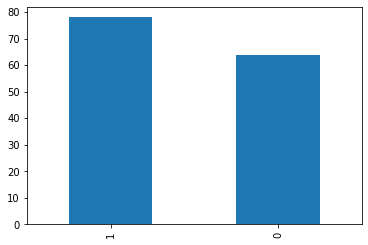

In [263]:
win2['label'].value_counts().plot(kind = 'bar')

In [265]:
win2.isnull().values.any()

False

In [266]:
win2['text'] = win2['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣\s]","")

In [268]:
win2['text'].replace('', 'NaN', inplace=True)

In [269]:
win2.isnull().values.any()

False

# 무승부 프레임과 승리2 기사를 합쳐서 Test set 으로 변경

In [274]:
test = pd.concat([drawed, win2],axis=0)

In [275]:
test

,text,label
0,레일리가 직접 타석에 들어서고 싶었을듯,0
1,에이스가 이정도 던져주면 이겨야 정상적인데 워낙에 비정상적인 팀이라,0
2,레일리가 선발급은 아니지만 내쫓자는건 올해만 야구 본거다 탈삼진 꾸준히 위안이고 평...,1
3,레일리 진심 ㅈㄴ 저평가 받는것같음,1
4,레일리 수고했어요 앞으로도 이렇게만 던져주길,1
...,...,...
138,잠실 방수포 실화냐ㅋㅋㅋ 저렇게 덮으면 무슨 의미가 있냐,0
139,우취 정도가 아니라 잠실에서 수영할 수 있을 정도로 비 많이 온다내 서울서 년 넘게...,0
140,어제는정말로직관갔는데 먹다가비오는줄은상상도못했었다,0
141,그냥 오늘 내일 우취하고 다른 심판조로 따로 날 잡아서 경기했으면한다,0


In [314]:
twitter = Okt()

In [326]:
X_train = []
for sentence in train['text']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) 
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_train.append(temp_X)

In [327]:
X_test = []
for sentence in test['text']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) 
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_test.append(temp_X)

In [328]:
X_test

[['직접', '타석', '들어서다', '싶다'],
 ['에이스',
  '이정',
  '도',
  '던지다',
  '이기다',
  '정상',
  '적',
  '인데',
  '워낙',
  '비정상',
  '적',
  '인',
  '팀',
  '이라'],
 ['선발',
  '급',
  '아니다',
  '내쫓다',
  '건',
  '올해',
  '만',
  '야구',
  '보다',
  '탈삼진',
  '꾸준하다',
  '위안',
  '이고',
  '평자',
  '도',
  '위',
  '슬로우',
  '스타',
  '터',
  '라',
  '그렇다',
  '텍사스',
  '출신',
  '이라',
  '덥다',
  '날',
  '댕',
  '기다',
  '항상',
  '그냥',
  '기다리다'],
 ['진심', 'ㅈㄴ', '저', '평가', '받다', '같다'],
 ['수고', '하다', '앞', '으로도', '이렇다', '던지다'],
 ['이르다',
  '를',
  '교체',
  '자다',
  '이렇다',
  '한두',
  '번',
  '이냐',
  '승',
  '을',
  '하다',
  '정상',
  '인데',
  '매번',
  '불펜',
  '날다',
  '먹다',
  '타자',
  '못',
  '해주다',
  '정녕',
  '못',
  '하다',
  '꼴다',
  '생각',
  '하다'],
 ['야',
  '늘',
  '고맙다',
  '늘',
  '미안',
  '타',
  '원',
  '중이',
  '득점',
  '그렇다',
  '잘',
  '내주다',
  '너',
  '만',
  '나오다',
  '왜',
  '그렇게',
  '짜다',
  'ㅠㅠ'],
 ['두산', '가다', '승은', '하다'],
 ['타율', '류현진', '방어율', '과', '경쟁', '중'],
 ['다',
  '익손',
  '합류',
  '후',
  '첫',
  '경기',
  '덕아웃',
  '에서',
  '보다',
  '어떤',
  '기분',
  '들다',
  '저',
  '정도',


In [329]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [330]:
Y_train = np.array(train['label'])
Y_test = np.array(test['label'])

In [331]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [332]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs=20, callbacks=[es, mc], batch_size=80, validation_split=0.4)

Epoch 1/20
3/3 [==============================] - ETA: 0s - loss: 0.0220 - acc: 0.9916   
Epoch 00001: val_acc did not improve from 0.82500
3/3 [==============================] - 2s 624ms/step - loss: 0.0220 - acc: 0.9916 - val_loss: 1.4311 - val_acc: 0.7312
Epoch 2/20
3/3 [==============================] - ETA: 0s - loss: 0.0076 - acc: 0.9958
Epoch 00002: val_acc did not improve from 0.82500
3/3 [==============================] - 0s 73ms/step - loss: 0.0076 - acc: 0.9958 - val_loss: 1.4656 - val_acc: 0.7250
Epoch 3/20
3/3 [==============================] - ETA: 0s - loss: 0.0073 - acc: 0.9958   
Epoch 00003: val_acc did not improve from 0.82500
3/3 [==============================] - 0s 81ms/step - loss: 0.0073 - acc: 0.9958 - val_loss: 1.4862 - val_acc: 0.7250
Epoch 4/20
3/3 [==============================] - ETA: 0s - loss: 0.0069 - acc: 0.9958    
Epoch 00004: val_acc did not improve from 0.82500
3/3 [==============================] - 0s 74ms/step - loss: 0.0069 - acc: 0.9958 - val_

In [333]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, Y_test)[1]))

9/9 [==============================] - 0s 9ms/step - loss: 0.7303 - acc: 0.6620

 테스트 정확도: 0.6620


In [334]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) 
  new_sentence = [word for word in new_sentence if not word in stopwords] 
  encoded = tokenizer.texts_to_sequences([new_sentence]) 
  pad_new = pad_sequences(encoded, maxlen = max_len)
  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [335]:
sentiment_predict('롯데 야구 개못해')

57.14% 확률로 부정 리뷰입니다.



In [336]:
sentiment_predict('롯데 짱')

52.83% 확률로 부정 리뷰입니다.



In [337]:
sentiment_predict('ㅋㅋㅋㅋㅋㅋㅋ.')

74.57% 확률로 부정 리뷰입니다.



In [339]:
sentiment_predict('뭐하노....')

70.75% 확률로 부정 리뷰입니다.



# 라벨의 숫자를 비슷하게 맞추었지만 정확도가 크게 향상되지는 않았다.  
# 데이터 전처리를 할 때 'ㅋ'나 'ㅇ'등을 제거하지 않았는데 
# 이런 부분도 영향을 주지 않았을까 생각한다.
# 정확도를 높이기 위해서는 조금 더 많은 데이터와 정확한 라벨링이
# 필요할 것 같다.

# 외적으로 댓글에 욕설이 굉장히 많고, 
# 반어적 표현이 정상적인 표현보다 훨씬 많음을 다시 한 번 확인 할 수 있었다.

# 잘 없어진 것 같다.

# 번외 2. konlpy에 있는 여러 모듈 차이점 알아보기.

In [352]:
# 텍스트로는 패배 기사의 첫번째 문장을 가져왔다. 너무 길면 인식이 안되는 것 같기에.

In [292]:
text = loss_datgeul[0]

In [293]:
text

'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ6회때 왜그렇게 했는지 이해가안된다 나는 ㅋㅋㅋㅋㅋ전준우 아웃당했으면 최소한 허일때 이대호를 대타로냈어야지 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ9회에 주자없는상태에서 이대호내고있네 무슨의미지? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'

In [297]:
#Hannanum

In [295]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.analyze(text))

[[[('ㅋㅋㅋㅋㅋ', 'ncn')], [('ㅋㅋㅋㅋㅋ', 'nqq')]], [[('ㅋㅋㅋㅋㅋ', 'ncn')], [('ㅋㅋㅋㅋㅋ', 'nqq')]], [[('ㅋㅋㅋ6회때', 'ncn')], [('ㅋㅋㅋ6회때', 'nqq')]], [[('왜그렇', 'ncn'), ('게', 'jca')], [('왜그렇게', 'ncn')], [('왜그렇', 'nqq'), ('게', 'jca')], [('왜그렇게', 'nqq')]], [[('하', 'pvg'), ('었', 'ep'), ('는지', 'ecc')], [('하', 'pvg'), ('었', 'ep'), ('는지', 'ecs')], [('하', 'pvg'), ('었', 'ep'), ('는지', 'ef')], [('하', 'pvg'), ('었', 'ep'), ('는', 'etm'), ('지', 'nbn')], [('하', 'px'), ('었', 'ep'), ('는지', 'ecc')], [('하', 'px'), ('었', 'ep'), ('는지', 'ecs')], [('하', 'px'), ('었', 'ep'), ('는지', 'ef')], [('하', 'px'), ('었', 'ep'), ('는', 'etm'), ('지', 'nbn')]], [[('이해가안된다', 'ncn')], [('이해가안된다', 'nqq')]], [[('나', 'ncn'), ('는', 'jxc')], [('나', 'npp'), ('는', 'jxc')], [('나', 'pvg'), ('는', 'etm')], [('나', 'px'), ('는', 'etm')], [('나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'pvg'), ('아', 'ef'), ('는', 'etm')], [('나', 'px'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'px'), ('아', 'ef'), ('는', 'etm')], [('날', 'pvg'), ('는', 'etm')]], [[('ㅋㅋㅋㅋㅋ전준우', 'ncn')], [(

In [350]:
# Hannanum은 쪼갠 단어(혹은 음절)의 품사를 함께 출력해주는데 쪼개지는 것에 있어서 정확도가 높지 않다보니 
# 이 역시도 정확도가 그리 높지 않은 것 같다.
# 그리고 문장이 길어지면 일단 너무 보기 지저분하다.
# 하고 싶던 분석도 그만하고 싶어지는 수준의 가독성.

In [298]:
#Kkma

In [296]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.morphs(text))

['ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '6', '회', '때', '왜', '그렇', '게', '하', '었', '는지', '이해', '가', '안되', 'ㄴ다', '나', '는', 'ㅋㅋㅋㅋㅋ', '전', '준우', '아웃', '당하', '었', '으면', '최소한', '허일', '때', '이대', '호', '를', '대타', '로', '내', '었', '어야지', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '9', '회', '에', '주자', '없', '는', '상태', '에서', '이대', '호', '내', '고', '있', '네', '무슨', '의', '미지', '?', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ']


In [299]:
#Komoran

In [300]:
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.morphs(text))

['ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ6회때', '왜', '그렇', '게', '하', '았', '는지', '이해', '가', '안되', 'ㄴ다', '나', '는', 'ㅋㅋㅋㅋㅋ전준우', '아웃', '당하', '았', '으면', '최소한', '허일', '때', '이대호', '를', '대타', '로', '내', '었', '어야지', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ9회에', '주자', '없', '는', '상태', '에서', '이대호', '내', '이', '고', '있', '네', '무슨', '의미', '지', '?', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ']


In [303]:
# Kkma와 Komoran의 경우 '냈어야지'라는 단어를  내 + 었 + 어야지의 형태로 구분을 해준다. (냈어야지 = 내었어야지의 축약형)
# 쪼개주다보니 원형을 파악하는 것에 도움을 주기는 하지만 '이대호 내고 있네' 의 경우 '내고' => '내다의 어간 내 + 어미+고'의 
# 형태인데 오히려 혼동을 주는 부분이 있는 것 같다.

In [301]:
#Mecab

In [302]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")
print(mecab.morphs(text))

['ㅋㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋ', 'ㅋㅋ', '6', '회', '때', '왜', '그렇', '게', '했', '는지', '이해', '가', '안', '된다', '나', '는', 'ㅋㅋㅋ', 'ㅋㅋ', '전준우', '아웃', '당했', '으면', '최소한', '허일', '때', '이대호', '를', '대타', '로', '냈', '어야지', 'ㅋㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋ', 'ㅋㅋ', '9', '회', '에', '주', '자', '없', '는', '상태', '에서', '이대호', '내', '고', '있', '네', '무슨', '의미', '지', '?', 'ㅋㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋ', 'ㅋㅋ']


In [351]:
# Mecab은 그렇게 원형을 찾아주지는 않는 것 같다. 아쉬운 부분은 9회, 주자 등 명사로 인식 할 수 있는 부분들이 쪼개진다는 것이다. 
# 이름 명사인 '전준우, 이대호, 허일' 등에 대한 인식은 잘 되는 것 같다.
# 'ㅋㅋㅋ'를 앞에서는 3,3,3,2,2 로, 끊는데 여기에는 무슨 규칙이 있는 것인지 궁금하다.

In [312]:
#twitter

In [310]:
from konlpy.tag import Okt
twitter = Okt()
print(twitter.morphs(text))

['ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '6회', '때', '왜', '그렇게', '했는지', '이해', '가', '안된다', '나', '는', 'ㅋㅋㅋㅋㅋ', '전준우', '아웃', '당했으면', '최소한', '허일', '때', '이대호', '를', '대타', '로', '냈어야지', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '9회', '에', '주자', '없는', '상태', '에서', '이대호', '내고있네', '무슨', '의미', '지', '?', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ']


In [313]:
# 이러한 부분들이 twitter를 사용하면 많이 해결이 되는 것 같다. 기호 구분이나 축약형이나 원형의 구분없이 조사나 띄어쓰기 등을 기반으로 
# 잘 끊어주는 것 같다.

In [338]:
# 위의 모델링에서 twitter를 사용해봤는데 정확도는 차이가 없었다.

# 번외 3. CNN 적용

In [340]:
import os
from wordcloud import WordCloud
import seaborn as sns

In [341]:
train_review = [review for review in train['text'] if type(review) is str]

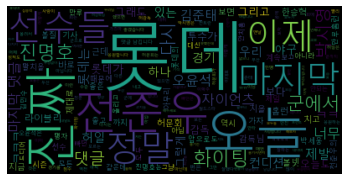

In [344]:
wordcloud = WordCloud(font_path = '.font/malgunsl.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [345]:
test_review = [review for review in test['text'] if type(review) is str]

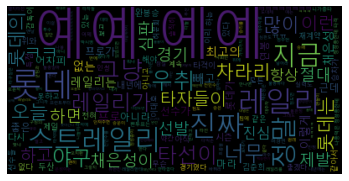

In [347]:
wordcloud = WordCloud(font_path = '.font/malgunsl.ttf').generate(' '.join(test_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [354]:
# CNN을 적용해야 하는데 이 부분은 차후 진행을 해보고 정확도를 살펴보아야겠다.
# 댓글 하나에 '예'가 도배된 것이 있었는데 그것 때문에 워드 클라우드에 나타나는 것 같다.

# 번외 4. 전처리 과정에 'ㅋ'와 같은 자-모음 모두 제거하고 테스트해보기